In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('extraLargeAmountsOfData.csv')

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [4]:
kmeans = KMeans(n_clusters=76, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
data['KMeans_Labels'] = kmeans_labels

In [5]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-0.1077658   1.03628305 -0.04078495 ... -0.18028687 -0.11918981
  -0.04419577]
 [-0.1077658  -0.13724231 -0.04078495 ... -0.18028687 -0.11918981
  -0.04419577]
 [ 0.19504539 -0.05665662 -0.04078495 ... -0.18028687 -0.11918981
  -0.04419577]
 ...
 [-0.1077658  -0.15056074 -0.04078495 ... -0.18028687 -0.11918981
  -0.04419577]
 [ 0.06935018 -0.15056074 -0.04078495 ... -0.18028687 -0.11918981
  -0.04419577]
 [-0.1077658  -0.15056074 -0.04078495 ... -0.18028687 -0.11918981
  -0.04419577]]


In [19]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(scaled_data)
data['DBSCAN_Labels'] = dbscan_labels

In [20]:
print("Number of clusters:", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Number of noise points:", list(dbscan_labels).count(-1))

Number of clusters: 169
Number of noise points: 13001


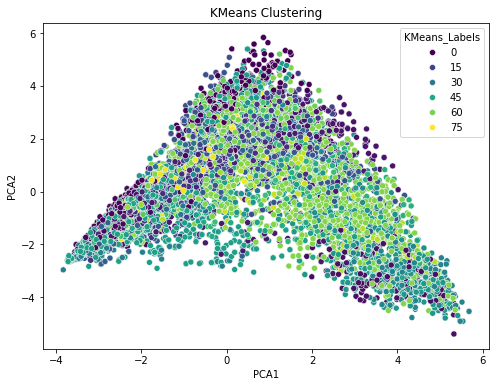

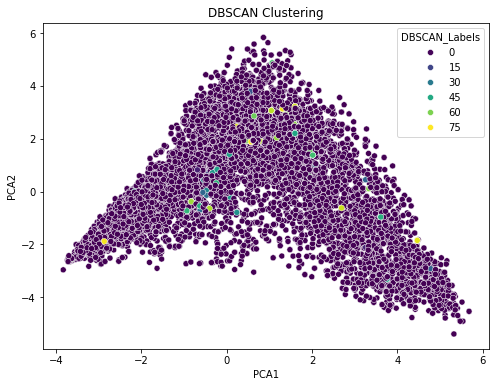

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Labels', data=data, palette='viridis')
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Labels', data=data, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print("KMeans Silhouette Score:", kmeans_silhouette)

filtered_data = scaled_data[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

dbscan_silhouette = silhouette_score(filtered_data, filtered_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

KMeans Silhouette Score: 0.057881504326864404
DBSCAN Silhouette Score: 0.9999999913966872


In [ ]:
kmeans_sse = kmeans.inertia_
print("KMeans SSE:", kmeans_sse)

dbscan_sse = 0

unique_labels = set(dbscan_labels) - {-1}

for label in unique_labels:
    cluster_points = scaled_data[dbscan_labels == label]
    
    centroid = np.mean(cluster_points)
    
    sse_cluster = np.sum((cluster_points - centroid) ** 2)
    dbscan_sse += sse_cluster

print("DBSCAN SSE (Updated Calculation):", dbscan_sse)

KMeans SSE: 2889231.7792562456
DBSCAN SSE (Updated Calculation): 72835.39317092781
